**Collect Data**

In [3]:
import praw
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import pandas as pd


In [31]:
#read in csv of my reddit API credentials
my_credentials = pd.read_csv('Reddit_Credentials.csv')

my_client_id = my_credentials.iloc[0,0]
my_client_secret = my_credentials.iloc[0,1]
my_user_agent = my_credentials.iloc[0,2]
my_user_agent


'birth control'

In [32]:
reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)


In [33]:
import pandas as pd
import datetime
posts = []
ml_subreddit = reddit.subreddit('BirthControl')
for post in ml_subreddit.hot(limit=None):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, datetime.datetime.fromtimestamp(post.created)])
# posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])


In [34]:
len(posts)

1002

In [6]:
def remove_urls_etc(text):
    # Convert text to lowercase and split to a list of words
    text =  re.sub(r'https://\S+', '', text)
    text =  re.sub(r'http://\S+', '', text)
    text =  re.sub(r'\n', '', text)
    text =  re.sub(r'@', 'at', text)
    text =  re.sub(r'[^A-Za-z0-9 (),.!?@\'\`/"\_\n]', '', text)
    return text


In [45]:
post_and_comments = []

#crashes after 600 requests, so get first 500 here and get everything after 500 in next cell 1002 in total
counter = 0
for post in posts[:500]:
    counter +=1
    print(counter)
    post_text = post[6]
    #clean post text by removing urls and other extra characters
    post_text =  remove_urls_etc(post_text)
    #split posts into individual sentences
    tokenized_post = (sent_tokenize(post_text))
    for sentence in tokenized_post:
        post_and_comments.append(sentence)
    
    submission = reddit.submission(id=post[2])
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        if comment.body != '[removed]':
            #clean post text by removing urls and other extra characters
            comment_text =  remove_urls_etc(comment.body)
            #split posts into individual sentences
            tokenized_comment = (sent_tokenize(comment_text))
            for sentence in tokenized_comment:
                post_and_comments.append(sentence)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [46]:
#crashes after 600 requests
for post in posts[500:]:
    counter +=1
    print(counter)
    post_text = post[6]
    #clean post text by removing urls and other extra characters
    post_text =  remove_urls_etc(post_text)
    #split posts into individual sentences
    tokenized_post = (sent_tokenize(post_text))
    for sentence in tokenized_post:
        post_and_comments.append(sentence)
    
    submission = reddit.submission(id=post[2])
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        if comment.body != '[removed]':
            #clean post text by removing urls and other extra characters
            comment_text =  remove_urls_etc(comment.body)
            #split posts into individual sentences
            tokenized_comment = (sent_tokenize(comment_text))
            for sentence in tokenized_comment:
                post_and_comments.append(sentence)


501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750


In [47]:
#see number of sentences gathered
len(post_and_comments)

23643

In [48]:
#convert list to dataframe
text_df = pd.DataFrame(post_and_comments, columns = ['text'])

In [49]:
text_df

,text
0,For those needing emergency assistance please...
1,Unfortunately there are myths about IUDs.
2,"( If you have a higher BMI, the Copper IUD is ..."
3,Cost?
4,In the USA 100 covered by insurance( New evid...
...,...
23638,Can I ask you how long it took for the pill to...
23639,I just started loestrin a few weeks ago and th...
23640,I want to stick it out because my periods were...
23641,"I bled for a year on lolo, it really depends o..."


In [50]:
#save dataframe as a csv
text_df.to_csv("Birth_Control_Text.csv")

**Clean Data**

In [4]:
data = pd.read_csv("Birth_Control_Text.csv")

In [5]:
data = data.drop(columns = 'Unnamed: 0')

In [6]:
data

,text
0,For those needing emergency assistance please...
1,Unfortunately there are myths about IUDs.
2,"( If you have a higher BMI, the Copper IUD is ..."
3,Cost?
4,In the USA 100 covered by insurance( New evid...
...,...
23638,Can I ask you how long it took for the pill to...
23639,I just started loestrin a few weeks ago and th...
23640,I want to stick it out because my periods were...
23641,"I bled for a year on lolo, it really depends o..."


In [7]:
#create list of stopwords. these are common words in the english language that are extraneous to analyze sentiment
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll",
 "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'into', 'through', 'during', 
 'before', 'after', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 'will', 'just', 'now',
 'd', 'll', 'm', 'o', 're', 've', 'y']

In [8]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def remove_stopwords(input):
    # Convert text to lowercase and split to a list of words
    tokens = word_tokenize(input.lower())
    # Remove stop words
    tokens_wo_stopwords = [t for t in tokens if t not in my_stopwords]
    #stem words
    tokens_wo_stopwords = [ps.stem(t) for t in tokens_wo_stopwords]
    return (" ".join(tokens_wo_stopwords))

data['clean_text'] = data['text'].apply(remove_stopwords)

In [9]:
data

,text,clean_text
0,For those needing emergency assistance please...,need emerg assist pleas use chat avail ( birth...
1,Unfortunately there are myths about IUDs.,unfortun myth iud .
2,"( If you have a higher BMI, the Copper IUD is ...","( higher bmi , copper iud best choic method le..."
3,Cost?,cost ?
4,In the USA 100 covered by insurance( New evid...,usa 100 cover insur ( new evid show hormon iud...
...,...,...
23638,Can I ask you how long it took for the pill to...,can ask long took pill help period ?
23639,I just started loestrin a few weeks ago and th...,start loestrin week ago breakthrough bleed las...
23640,I want to stick it out because my periods were...,want stick period nightmar alway spot
23641,"I bled for a year on lolo, it really depends o...","bled year lolo , realli depend bodi ."


In [10]:
#Save cleaned data to a csv
data.to_csv("Cleaned_BC_Data.csv")

**Analysis**

In [11]:
#add a column for each form of birth control with a 1 to denote the mention of that birth control and a 0 otherwise
data['iud'] = data['clean_text'].str.contains("iud").astype(int)
data['pill'] = data['clean_text'].str.contains("pill").astype(int)
data['condom'] = data['clean_text'].str.contains("condom").astype(int)
data['implant'] = data['clean_text'].str.contains("implant").astype(int)
data['patch'] = data['clean_text'].str.contains("patch").astype(int)

In [12]:
data

,text,clean_text,iud,pill,condom,implant,patch
0,For those needing emergency assistance please...,need emerg assist pleas use chat avail ( birth...,1,0,0,0,0
1,Unfortunately there are myths about IUDs.,unfortun myth iud .,1,0,0,0,0
2,"( If you have a higher BMI, the Copper IUD is ...","( higher bmi , copper iud best choic method le...",1,0,0,0,0
3,Cost?,cost ?,0,0,0,0,0
4,In the USA 100 covered by insurance( New evid...,usa 100 cover insur ( new evid show hormon iud...,1,0,0,0,0
...,...,...,...,...,...,...,...
23638,Can I ask you how long it took for the pill to...,can ask long took pill help period ?,0,1,0,0,0
23639,I just started loestrin a few weeks ago and th...,start loestrin week ago breakthrough bleed las...,0,0,0,0,0
23640,I want to stick it out because my periods were...,want stick period nightmar alway spot,0,0,0,0,0
23641,"I bled for a year on lolo, it really depends o...","bled year lolo , realli depend bodi .",0,0,0,0,0


In [13]:
for bc_type in ['iud', 'pill', 'condom', 'implant', 'patch']:

    print(f"Number of datapoints about {bc_type}: {data[data[bc_type]==1].shape[0]}")

Number of datapoints about iud: 1349
Number of datapoints about pill: 2331
Number of datapoints about condom: 507
Number of datapoints about implant: 410
Number of datapoints about patch: 190


In [14]:
#new column, column_occurences, is the number of distinct birth controls mentioned within a datapoint
data['column_occurences'] = data[["iud","pill","condom","implant","patch"]].sum(axis=1)
data

,text,clean_text,iud,pill,condom,implant,patch,column_occurences
0,For those needing emergency assistance please...,need emerg assist pleas use chat avail ( birth...,1,0,0,0,0,1
1,Unfortunately there are myths about IUDs.,unfortun myth iud .,1,0,0,0,0,1
2,"( If you have a higher BMI, the Copper IUD is ...","( higher bmi , copper iud best choic method le...",1,0,0,0,0,1
3,Cost?,cost ?,0,0,0,0,0,0
4,In the USA 100 covered by insurance( New evid...,usa 100 cover insur ( new evid show hormon iud...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
23638,Can I ask you how long it took for the pill to...,can ask long took pill help period ?,0,1,0,0,0,1
23639,I just started loestrin a few weeks ago and th...,start loestrin week ago breakthrough bleed las...,0,0,0,0,0,0
23640,I want to stick it out because my periods were...,want stick period nightmar alway spot,0,0,0,0,0,0
23641,"I bled for a year on lolo, it really depends o...","bled year lolo , realli depend bodi .",0,0,0,0,0,0


In [15]:
#remove datapoints where multiple birth control forms are mentioned

data = data[data['column_occurences']<=1]
data

,text,clean_text,iud,pill,condom,implant,patch,column_occurences
0,For those needing emergency assistance please...,need emerg assist pleas use chat avail ( birth...,1,0,0,0,0,1
1,Unfortunately there are myths about IUDs.,unfortun myth iud .,1,0,0,0,0,1
2,"( If you have a higher BMI, the Copper IUD is ...","( higher bmi , copper iud best choic method le...",1,0,0,0,0,1
3,Cost?,cost ?,0,0,0,0,0,0
4,In the USA 100 covered by insurance( New evid...,usa 100 cover insur ( new evid show hormon iud...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
23638,Can I ask you how long it took for the pill to...,can ask long took pill help period ?,0,1,0,0,0,1
23639,I just started loestrin a few weeks ago and th...,start loestrin week ago breakthrough bleed las...,0,0,0,0,0,0
23640,I want to stick it out because my periods were...,want stick period nightmar alway spot,0,0,0,0,0,0
23641,"I bled for a year on lolo, it really depends o...","bled year lolo , realli depend bodi .",0,0,0,0,0,0


**Look at each birth control type individually and get sentiment**

In [16]:
#import sentiment analyzer and initialize instance
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#functions to get sentiment:
def get_neg(text):
    return sia.polarity_scores(text)['neg']

def get_neu(text):
    return sia.polarity_scores(text)['neu']

def get_pos(text):
    return sia.polarity_scores(text)['pos']

def get_compound(text):
    return sia.polarity_scores(text)['compound']


In [17]:
#get side effects mentioned
side_effect_list = ['pain', 'cramp', 'bleed', 'spot', 'irregular', 'mood swing',
                   'depress', 'weight gain', 'weight loss', 'allerg', 'burn', 'rash', 'itch', 
                    'tire', 'vomit', 'nausea', 'perforate', 'tender']
    
#iterate through birth controls and get the sentiment about each side effect for that birth control    
sentiment_dict = {}

for birth_control in ["iud","pill","condom","implant","patch"]:

    #only datapoints where that birth control is mentioned
    subset_df = data[data[birth_control]==1][['clean_text', birth_control]]

    for effect in side_effect_list:
        subset_df[effect] = subset_df['clean_text'].str.contains(effect).astype(int)


    #add a column for if the sentiment of that sentence is negative, neutral, positive
    #additionally add the compound which is one factor that incorporates the previous 3 columns
    subset_df['neg'] = subset_df['clean_text'].apply(get_neg)
    subset_df['neu'] = subset_df['clean_text'].apply(get_neu)
    subset_df['pos'] = subset_df['clean_text'].apply(get_pos)
    subset_df['compound'] = subset_df['clean_text'].apply(get_compound)

    #need to get average compound for each side effect
    #get number of occurences of each side effect
    all_sentiment = []
    all_occurences = []

    for effect in side_effect_list:
        #get compound sentiment for each side effect
        compound_sentiment = subset_df[subset_df[effect]==1]['compound'].mean()
        all_sentiment.append(compound_sentiment)

        occurences = subset_df[subset_df[effect]==1].shape[0]   
        all_occurences.append(occurences)

    sentiment_df = pd.DataFrame([all_sentiment, all_occurences], columns = side_effect_list, index = [f'{birth_control} sentiment', f'{birth_control} occurences'])
#     sentiment_df[f'{birth_control} occurences'] = sentiment_df[f'{birth_control} occurences'].astype(int)
    sentiment_dict[birth_control] = sentiment_df
    

In [18]:
sentiment_dict['pill']

,pain,cramp,bleed,spot,irregular,mood swing,depress,weight gain,weight loss,allerg,burn,rash,itch,tire,vomit,nausea,perforate,tender
pill sentiment,-0.431145,-0.36936,0.001696,0.00347,-0.035293,-0.008364,-0.341418,0.188067,-0.356733,-0.3182,NaN,0.3612,0.000513,-0.40895,-0.008764,-0.07635,NaN,0.7783
pill occurences,31.000000,25.00000,130.000000,37.00000,14.000000,11.000000,17.000000,15.000000,3.000000,1.0000,0.0,1.0000,68.000000,2.00000,11.000000,8.00000,0.0,1.0000


In [19]:
all_sentiment = pd.concat([sentiment_dict['iud'], sentiment_dict['pill'],
          sentiment_dict['condom'],
          sentiment_dict['implant'],
          sentiment_dict['patch']])

all_sentiment

,pain,cramp,bleed,spot,irregular,mood swing,depress,weight gain,weight loss,allerg,burn,rash,itch,tire,vomit,nausea,perforate,tender
iud sentiment,-0.323531,-0.19294,-0.118155,-0.006665,-0.194444,NaN,-0.368040,0.064260,NaN,-0.318600,NaN,-0.5719,0.079785,0.00000,-0.555750,0.00000,NaN,-0.2315
iud occurences,81.000000,53.00000,40.000000,17.000000,9.000000,0.000000,5.000000,5.000000,0.000000,2.000000,0.0,1.0000,34.000000,1.00000,2.000000,2.00000,0.0,1.0000
pill sentiment,-0.431145,-0.36936,0.001696,0.003470,-0.035293,-0.008364,-0.341418,0.188067,-0.356733,-0.318200,NaN,0.3612,0.000513,-0.40895,-0.008764,-0.07635,NaN,0.7783
pill occurences,31.000000,25.00000,130.000000,37.000000,14.000000,11.000000,17.000000,15.000000,3.000000,1.000000,0.0,1.0000,68.000000,2.00000,11.000000,8.00000,0.0,1.0000
condom sentiment,-0.627600,NaN,0.328200,NaN,NaN,NaN,NaN,0.016000,NaN,-0.446767,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
condom occurences,3.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0,0.0000,1.000000,0.00000,0.000000,0.00000,0.0,0.0000
implant sentiment,-0.096823,-0.52600,-0.060676,-0.122840,-0.127720,0.296000,-0.642333,0.324600,NaN,NaN,NaN,NaN,-0.072186,-0.75815,NaN,NaN,NaN,NaN
implant occurences,13.000000,3.00000,37.000000,5.000000,5.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.0000,7.000000,2.00000,0.000000,0.00000,0.0,0.0000
patch sentiment,NaN,-0.00180,0.014400,0.007700,NaN,NaN,NaN,NaN,0.226300,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN
patch occurences,0.000000,1.00000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0000,3.000000,0.00000,0.000000,2.00000,0.0,0.0000


In [46]:
print("====================FOR IUD====================")
print(f"MIN: {all_sentiment.columns[all_sentiment.iloc[0].argmin()]} : {round(all_sentiment.iloc[0].min(),2)}")
print(f"MAX: {all_sentiment.columns[all_sentiment.iloc[0].argmax()]} : {round(all_sentiment.iloc[0].max(),2)}")

print("====================FOR PILL====================")
print(f"MIN: {all_sentiment.columns[all_sentiment.iloc[2].argmin()]} : {round(all_sentiment.iloc[2].min(),2)}")
print(f"MAX: {all_sentiment.columns[all_sentiment.iloc[2].argmax()]} : {round(all_sentiment.iloc[2].max(),2)}")

print("====================FOR CONDOM====================")
print(f"MIN: {all_sentiment.columns[all_sentiment.iloc[4].argmin()]} : {round(all_sentiment.iloc[4].min(),2)}")
print(f"MAX: {all_sentiment.columns[all_sentiment.iloc[4].argmax()]} : {round(all_sentiment.iloc[4].max(),2)}")

print("====================FOR IMPLANT====================")
print(f"MIN: {all_sentiment.columns[all_sentiment.iloc[6].argmin()]} : {round(all_sentiment.iloc[6].min(),2)}")
print(f"MAX: {all_sentiment.columns[all_sentiment.iloc[6].argmax()]} : {round(all_sentiment.iloc[6].max(),2)}")

print("====================FOR PATCH====================")
print(f"MIN: {all_sentiment.columns[all_sentiment.iloc[8].argmin()]} : {round(all_sentiment.iloc[8].min(),2)}")
print(f"MAX: {all_sentiment.columns[all_sentiment.iloc[8].argmax()]} : {round(all_sentiment.iloc[8].max(),2)}")

====================FOR IUD====================
MIN: rash : -0.57
MAX: itch : 0.08
====================FOR PILL====================
MIN: pain : -0.43
MAX: tender : 0.78
====================FOR CONDOM====================
MIN: pain : -0.63
MAX: bleed : 0.33
====================FOR IMPLANT====================
MIN: tire : -0.76
MAX: weight gain : 0.32
====================FOR PATCH====================
MIN: cramp : -0.0
MAX: weight loss : 0.23


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def graph_plot(birth_control):
    y = np.array([0 for i in range(18)])
    x = sentiment_dict[birth_control].iloc[0]
    n = sentiment_dict[birth_control].columns
    colors = np.random.rand(18)


    fig, ax = plt.subplots(figsize=(15,5))


    ax.scatter(x, y,
              s=(1 * sentiment_dict[birth_control].iloc[1])**2, c=colors, alpha=0.5)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), rotation = 45)
        
    ax.set_title(f'{birth_control} plot')
    ax.set_xlabel('sentiment')
    ax.set_ylabel('occurences (via radius)')
        
    plt.savefig(f'{birth_control}.pdf')



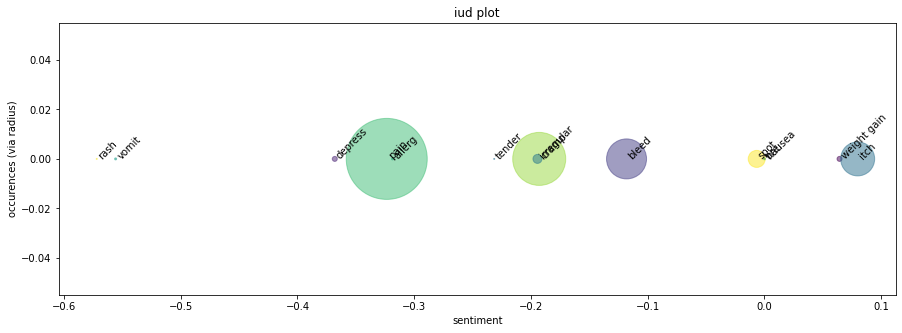

In [85]:
graph_plot('iud')


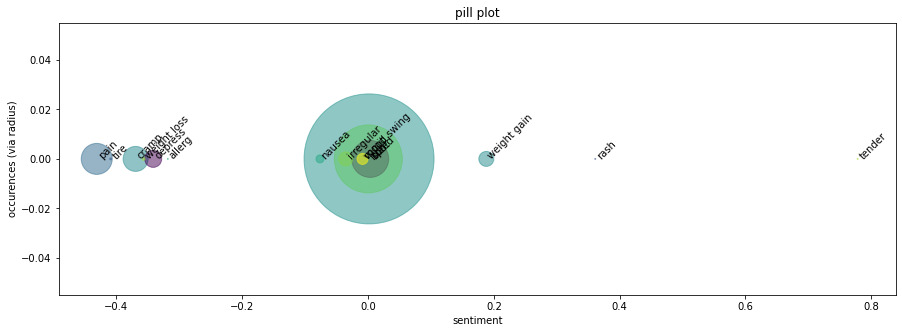

In [86]:
graph_plot('pill')

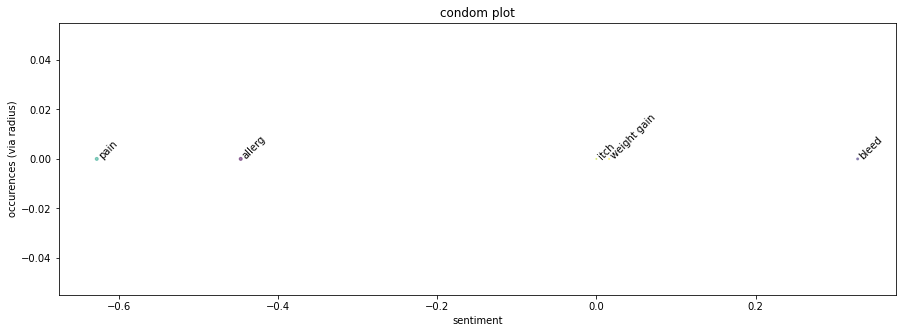

In [87]:
graph_plot('condom')

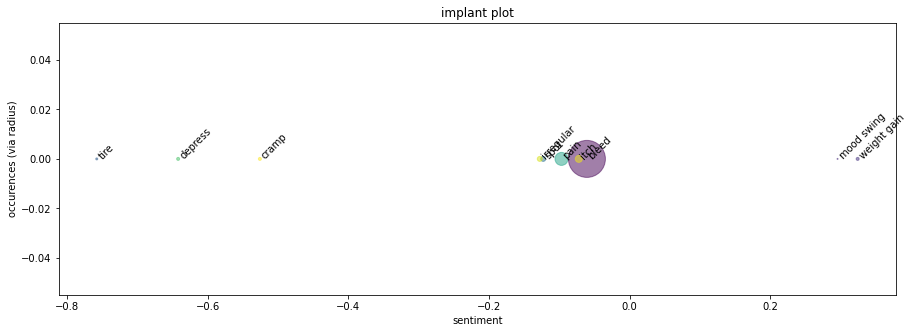

In [88]:
graph_plot('implant')

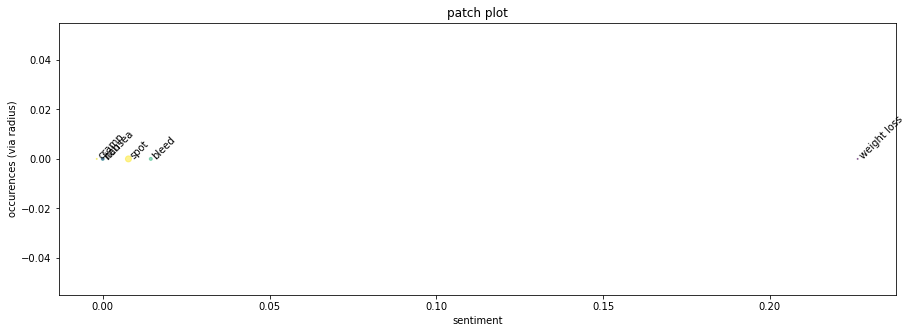

In [89]:
graph_plot('patch')